## Importing the Packages and Libraries

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Import the Dataset 

In [43]:
from sklearn.datasets import load_digits
digits = load_digits()
data = digits.data

## 1. Check the Shape of the Digits Data 

In [44]:
shape_data = digits.data.shape
shape_data

(1797, 64)

In [45]:
image_shape = digits.images.shape
image_shape

(1797, 8, 8)

## 2. Flatten the pixels create a vector of length 64 for every image. It should be a matrix with samples in row and pixels in columns. 

In [46]:
images = digits.images
labels = digits.target

m = images.shape[0]
flattened_images = images.reshape(m, -1)

# Flatten the images and create a matrix with samples in rows and pixels in columns
# flattened_images = images.reshape(images.shape[0], -1)

flattened_images

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

## 3. Sample image to view, the last digit of my ID is 4 (ID: 2315034) 

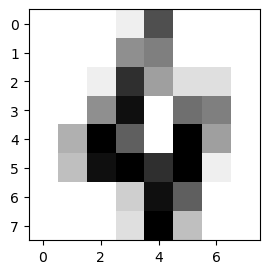

In [47]:
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[4], cmap=plt.cm.gray_r, interpolation="nearest")  # Using ID last digit(4)
plt.show()

## 4. Apply PCA, to reduce the image dimensions from 64 to just r 

### 4(a). Transpose of image matrix so that pixels (features, n) are in row and samples (m) are in column 

In [48]:
transposed_images = np.transpose(images, (0, 2, 1)).reshape(images.shape[0], -1)
transposed_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### 4(b). Next do mean subtraction for each image  

In [49]:
mean_image = np.mean(transposed_images, axis=0)
mean_subtracted_images = transposed_images - mean_image
mean_subtracted_images

array([[ 0.        , -0.00556483, -0.00278242, ..., -0.02726767,
        -0.2064552 , -0.36449638],
       [ 0.        , -0.00556483, -0.00278242, ..., -0.02726767,
        -0.2064552 , -0.36449638],
       [ 0.        , -0.00556483, -0.00278242, ..., -0.02726767,
        -0.2064552 , -0.36449638],
       ...,
       [ 0.        , -0.00556483, -0.00278242, ..., -0.02726767,
        -0.2064552 , -0.36449638],
       [ 0.        , -0.00556483, -0.00278242, ..., -0.02726767,
        -0.2064552 , -0.36449638],
       [ 0.        , -0.00556483, -0.00278242, ..., -0.02726767,
        -0.2064552 , -0.36449638]])

### 4(c). Then compute Covariance matrix. It should be of size nxn 

In [50]:
cov_matrix = np.cov(mean_subtracted_images, rowvar=False)
cov_matrix

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  8.87770139e-03,  1.65488633e-03, ...,
        -1.51824434e-04,  1.07764364e-03, -9.15904136e-04],
       [ 0.00000000e+00,  1.65488633e-03,  3.88980397e-03, ...,
        -7.59122170e-05, -5.74763928e-04,  1.76921942e-03],
       ...,
       [ 0.00000000e+00, -1.51824434e-04, -7.59122170e-05, ...,
         9.44676416e-02,  1.17975331e-01,  3.41852853e-03],
       [ 0.00000000e+00,  1.07764364e-03, -5.74763928e-04, ...,
         1.17975331e-01,  9.69045167e-01,  1.03272374e+00],
       [ 0.00000000e+00, -9.15904136e-04,  1.76921942e-03, ...,
         3.41852853e-03,  1.03272374e+00,  3.46005282e+00]])

### 4(d). Then calculate SVD and get the eigenvector matrix 

In [51]:
U, S, V = np.linalg.svd(cov_matrix)
U

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-3.20516495e-04, -1.63216259e-04,  3.93971137e-04, ...,
        -6.91985074e-14,  0.00000000e+00, -5.59283154e-17],
       [-4.94136398e-05, -4.22872096e-05,  2.12613357e-04, ...,
         3.53473214e-13,  0.00000000e+00,  4.75401274e-17],
       ...,
       [ 1.61485028e-03,  1.32726068e-03,  2.92247625e-03, ...,
         1.09287579e-16,  0.00000000e+00,  4.30785712e-17],
       [ 9.61671077e-04,  5.42290907e-04,  2.18621440e-02, ...,
        -3.88578059e-16,  0.00000000e+00,  1.94632329e-16],
       [-1.14684954e-02, -6.69693895e-03,  3.48043832e-02, ...,
        -2.77555756e-16,  0.00000000e+00,  7.29371865e-17]])

### 4(e). Take the top r eigenvectors and generate the reduced dimension image as taught in class. 

In [68]:
r = 10  
U_r = U[:, -r:]

reduced_images = np.dot(mean_subtracted_images, U_r)

reconstructed_images = np.dot(reduced_images, U_r.T)
reconstructed_images = reconstructed_images + mean_image
reconstructed_images = np.transpose(reconstructed_images.reshape(images.shape[0], 8, 8), (0, 2, 1))
reconstructed_images

array([[[ 0.00000000e+00,  3.03204312e-01,  5.20461568e+00, ...,
          5.78186140e+00,  1.36231472e+00,  1.30661660e-01],
        [ 1.66137321e-02,  1.99385062e+00,  1.03822617e+01, ...,
          8.17588674e+00,  1.84626466e+00,  1.05261367e-01],
        [ 4.06016796e-03,  2.60166055e+00,  9.90313434e+00, ...,
          7.80629483e+00,  1.78865679e+00,  5.42496202e-02],
        ...,
        [-1.02626298e-02,  1.58408095e+00,  6.88128930e+00, ...,
          8.23651278e+00,  3.45625451e+00,  2.74146419e-02],
        [-3.79139998e-02,  7.06772906e-01,  7.50681218e+00, ...,
          8.75850123e+00,  3.72522691e+00,  2.06336985e-01],
        [-1.35243881e-03,  2.79111095e-01,  5.55767439e+00, ...,
          6.76408555e+00,  2.06776830e+00,  3.64621772e-01]],

       [[ 0.00000000e+00,  3.02612517e-01,  5.20459060e+00, ...,
          5.78183118e+00,  1.36232150e+00,  1.30493025e-01],
        [-3.08650466e-02,  1.99439833e+00,  1.03822585e+01, ...,
          8.17593888e+00,  1.84630413e

### 4(f). Plot the digit image with reduced dimension (take the sample with last digit of my ID = 4) 

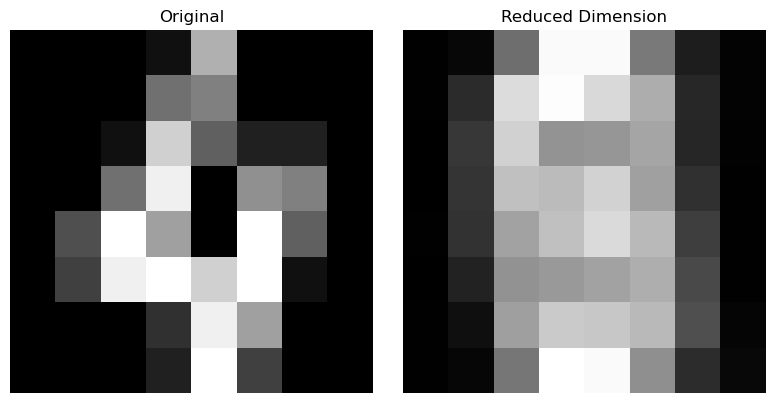

In [73]:
sample_index = 4

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

axes[0].imshow(images[sample_index], cmap='gray')
axes[0].axis('off')
axes[0].set_title('Original')

axes[1].imshow(reconstructed_images[sample_index], cmap='gray')
axes[1].axis('off')
axes[1].set_title('Reduced Dimension')

plt.tight_layout()
plt.show()

In [ ]:
Requirements:
             1. Knowledge of Principal Component Analysis (PCA)
             2. Knowledge about Digits Dataset
             3. Basic Python Programming
             4. Python Packages & Libraries
             5. Jupyter Notebook